In [ ]:
#!/usr/bin/env python
# -*- encoding: utf-8 -*-
'''
@文件        :024.recruitmentGene.ipynb
@说明        :to calculate the recruitment of genes 
@时间        :2023/09/02 08:15:45
@作者        :Wu Baosheng
@版本        :1.0
'''

In [1]:
import scanpy as sc
import scanpy.external as sce
import pandas as pd
import numpy as np
import re,sys,os
# adata=sc.read('H:/002.singcell/01.liver/10.mutileSpecies/05.SAMap/sevenSpecies.integrate_counts.h5ad')

In [2]:
info=adata.obs

In [2]:
info = pd.read_csv('H:/002.singcell/01.liver/10.mutileSpecies/05.SAMap/sevenSpecies.obs.csv',sep='\t',header=0,index_col=0)

In [3]:
info

,cell type,cluster,species,sample,batch,cell_type,leiden
AAACCCAAGAGCTGAC-1-bichir,Hepatocyte,bichir0,bichir,bichir,bichir,hepatocyte,2
AAACCCACAACGACTT-1-bichir,Hepatic stellate cells,bichir1,bichir,bichir,bichir,stellate,8
AAACCCACAGCGCGTT-1-bichir,Hepatocyte,bichir0,bichir,bichir,bichir,hepatocyte,6
AAACCCACATCTAGAC-1-bichir,Hepatocyte,bichir0,bichir,bichir,bichir,lymphocyte,3
AAACCCAGTCGTGCCA-1-bichir,Hepatocyte,bichir0,bichir,bichir,bichir,hepatocyte,2
...,...,...,...,...,...,...,...
TTTGTTGTCTAGAACC-1-lancelet2,lancelet_0,lancelet_0,lancelet,liver2,lancelet,lymphocyte,1
TTTGTTGTCTAGTACG-1-lancelet2,lancelet_0,lancelet_0,lancelet,liver2,lancelet,lymphocyte,1
TTTGTTGTCTCCTGAC-1-lancelet2,lancelet_1,lancelet_1,lancelet,liver2,lancelet,hepatocyte,2
TTTGTTGTCTCGCCTA-1-lancelet2,lancelet_0,lancelet_0,lancelet,liver2,lancelet,lymphocyte,3


In [6]:
def readH5ad(adata_path):
    adata = sc.read_h5ad(adata_path)
    adata.X=adata.layers['counts'].copy()
    sc.pp.normalize_total(adata,target_sum=1e6,exclude_highly_expressed=True)
    sc.pp.log1p(adata)
    adata.raw = adata
    sc.pp.highly_variable_genes(adata, flavor='seurat', n_top_genes=2000, inplace=True)
    sc.pp.scale(adata, max_value=10)
    return adata

In [7]:
lamprey=readH5ad('H:/002.singcell/01.liver/10.mutileSpecies/05.SAMap/01.h5ad_counts/lamprey_counts.h5ad')

In [8]:
lamprey.obs['cell_type']=info['cell_type']

In [9]:
lamprey=lamprey[lamprey.obs['cell_type']!='redCell']

c:\Users\wubaosheng\AppData\Local\Programs\Python\Python39\lib\site-packages\anndata\_core\anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


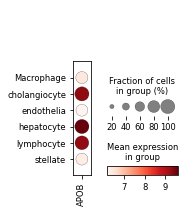

In [10]:
sc.pl.dotplot(lamprey,['APOB'],groupby='cell_type')

In [13]:
# lamprey.write('H:/002.singcell/01.liver/10.mutileSpecies/05.SAMap/01.h5ad_counts/cell_type/lamprey_counts.h5ad')

In [11]:
lancelet=readH5ad('H:/002.singcell/01.liver/10.mutileSpecies/05.SAMap/01.h5ad_counts/count_new/lancelet_counts.h5ad')

In [12]:
lancelet.obs['cell_type']=info['cell_type']
lancelet=lancelet[lancelet.obs['cell_type']!='redCell']

In [16]:
# lancelet.write('H:/002.singcell/01.liver/10.mutileSpecies/05.SAMap/01.h5ad_counts/cell_type/lancelet_counts.h5ad')

In [13]:
dogshark=readH5ad('H:/002.singcell/01.liver/10.mutileSpecies/05.SAMap/01.h5ad_counts/dogshark_counts.h5ad')
dogshark.obs['cell_type']=info['cell_type']
dogshark=dogshark[dogshark.obs['cell_type']!='redCell']
# dogshark.write('H:/002.singcell/01.liver/10.mutileSpecies/05.SAMap/01.h5ad_counts/cell_type/dogshark_counts.h5ad')

In [14]:
bichir=readH5ad('H:/002.singcell/01.liver/10.mutileSpecies/05.SAMap/01.h5ad_counts/count_new/bichir_counts.h5ad')
# bichir.obs['cell_type']=info['cell_type']
# bichir=bichir[bichir.obs['cell_type']!='redCell']
# bichir.write('H:/002.singcell/01.liver/10.mutileSpecies/05.SAMap/01.h5ad_counts/cell_type/bichir_counts.h5ad')

In [15]:
df_bichir = info[info['species']=='bichir']

In [16]:
df_bichir.index=df_bichir.index.str.split('-bichir').str[0]

In [17]:
bichir.obs['cell_type']=df_bichir['cell_type']

In [18]:
bichir.obs['cell_type'].unique()

array([nan, 'hepatocyte', 'stellate', 'lymphocyte', 'endothelia',
       'Macrophage', 'cholangiocyte'], dtype=object)

In [19]:
t=['hepatocyte', 'stellate', 'lymphocyte', 'endothelia', 'Macrophage', 'cholangiocyte']

In [20]:
bichir=bichir[bichir.obs['cell_type'].isin(t)]

In [38]:
# bichir.write('H:/002.singcell/01.liver/10.mutileSpecies/05.SAMap/01.h5ad_counts/cell_type/bichir_counts.h5ad')

In [21]:
lungfish=readH5ad('H:/002.singcell/01.liver/10.mutileSpecies/05.SAMap/01.h5ad_counts/count_new/lungfish_counts.h5ad')
lungfish.obs['cell_type']=info['cell_type']
lungfish=lungfish[lungfish.obs['cell_type']!='redCell']
# lungfish.write('H:/002.singcell/01.liver/10.mutileSpecies/05.SAMap/01.h5ad_counts/cell_type/lungfish_counts.h5ad')

In [22]:
frog=readH5ad('H:/002.singcell/01.liver/10.mutileSpecies/05.SAMap/01.h5ad_counts/count_new/frog_counts.h5ad')
frog.obs['cell_type']=info['cell_type']
frog=frog[frog.obs['cell_type']!='redCell']
# frog.write('H:/002.singcell/01.liver/10.mutileSpecies/05.SAMap/01.h5ad_counts/cell_type/frog_counts.h5ad')

c:\Users\wubaosheng\AppData\Local\Programs\Python\Python39\lib\site-packages\anndata\_core\anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


In [23]:
human=readH5ad('H:/002.singcell/01.liver/10.mutileSpecies/05.SAMap/01.h5ad_counts/count_new/human_counts.h5ad')
human.obs['cell_type']=info['cell_type']
human=human[human.obs['cell_type']!='redCell']
# human.write('H:/002.singcell/01.liver/10.mutileSpecies/05.SAMap/01.h5ad_counts/cell_type/human_counts.h5ad')

In [24]:
recruitmentGene=pd.read_csv('H:/002.singcell/01.liver/10.mutileSpecies/05.SAMap/017. HVGs/recruited genes.txt',sep='\t',header=None,names=['recruit'])

In [25]:
species =['bichir2','dogshark','frog','human','lamprey', 'lancelet', 'lungfish']
def gene2Name():
    dic1 = {}
    path='H:/002.singcell/01.liver/10.mutileSpecies/05.SAMap/04.gene2names'
    for i in os.listdir(path):
        if i.endswith('.tsv'):
            # dic1 = {}
            sp = i.split('.')[0]
            if sp in species:
                file =open(path+'/'+i,'r')
                for line in file:
                    line = line.strip().split('\t')
                    dic1[line[0]] = line[1]
                    # dic2[sp] = dic1
                file.close()
        else:
            continue
    return dic1
gene_names = gene2Name()

In [26]:
def get_keys_by_value(dictionary, value):
    keys = []
    for key, val in dictionary.items():
        if val == value:
            keys.append(key)
    return keys


In [27]:
for x in get_keys_by_value(gene_names,'NRP2'):
    print(x)

BICHIR120531960
PRE04601
FROG009833
NRP2
QSM017441
QSM084873
QSM121323
QSM146998
QSM159176
LOC118413723
LOC118418864
LOC118422151
LOC118425336
LOC118425430
LOC118404856
LOC118405041


In [73]:
os.chdir('H:/002.singcell/01.liver/10.mutileSpecies/05.SAMap/18.recruitment')

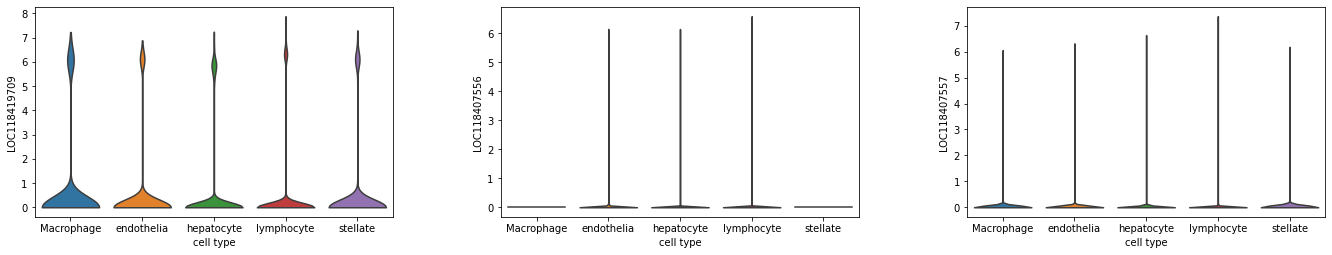

In [82]:
sc.pl.violin(lancelet,['LOC118419709','LOC118407556','LOC118407557'],groupby='cell_type',stripplot=False,save='_lancelet_FLT.pdf')

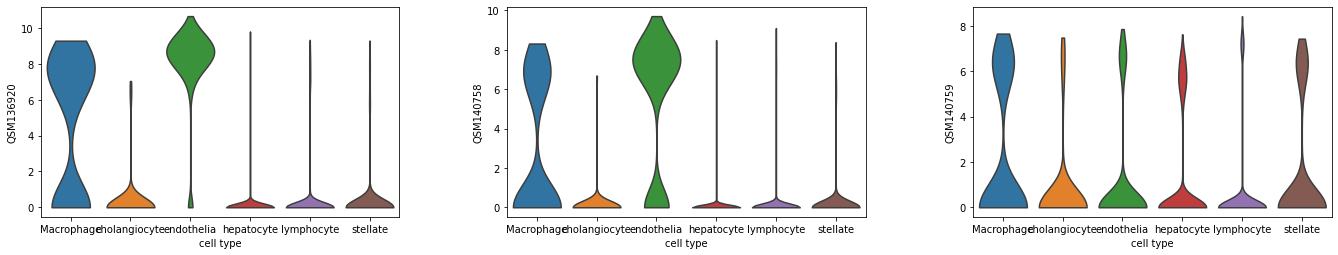

In [83]:
sc.pl.violin(lamprey,['QSM136920','QSM140758','QSM140759'],groupby='cell_type',stripplot=False,save='_lamprey_FLT.pdf')

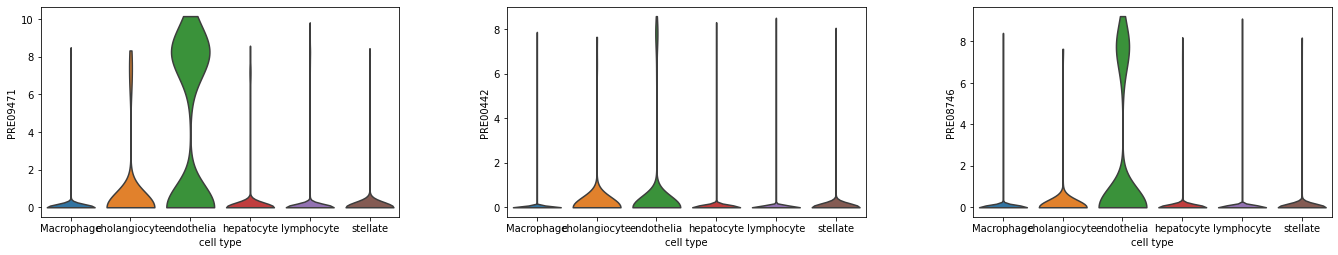

In [77]:
sc.pl.violin(dogshark,['PRE09471','PRE00442','PRE08746'],groupby='cell_type',stripplot=False,save='_dogshark_FLT.pdf')

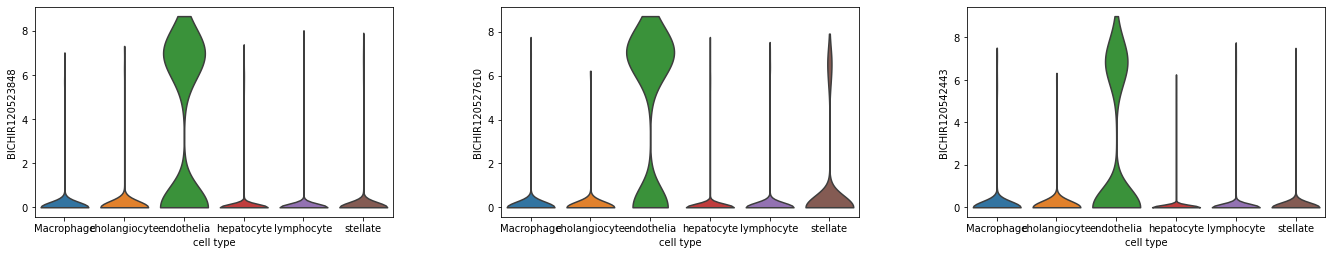

In [78]:
sc.pl.violin(bichir,['BICHIR120523848','BICHIR120527610','BICHIR120542443'],groupby='cell_type',stripplot=False,save='_bichir_FLT.pdf')

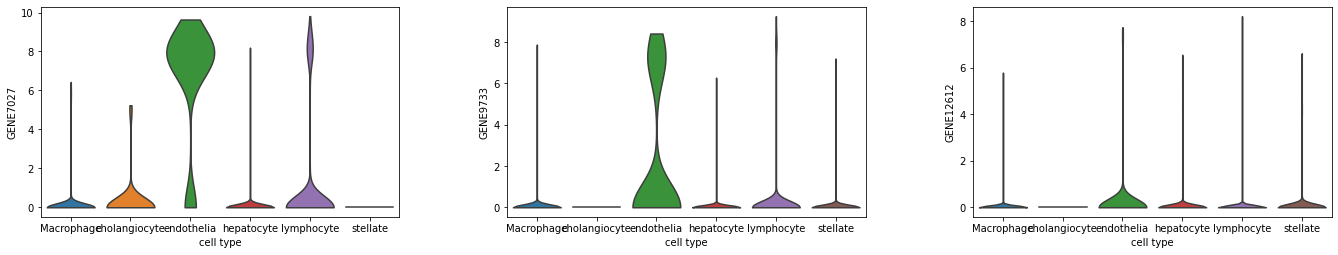

In [79]:
sc.pl.violin(lungfish,['GENE7027','GENE9733','GENE12612'],groupby='cell_type',stripplot=False,save='_lungfish_FLT.pdf')

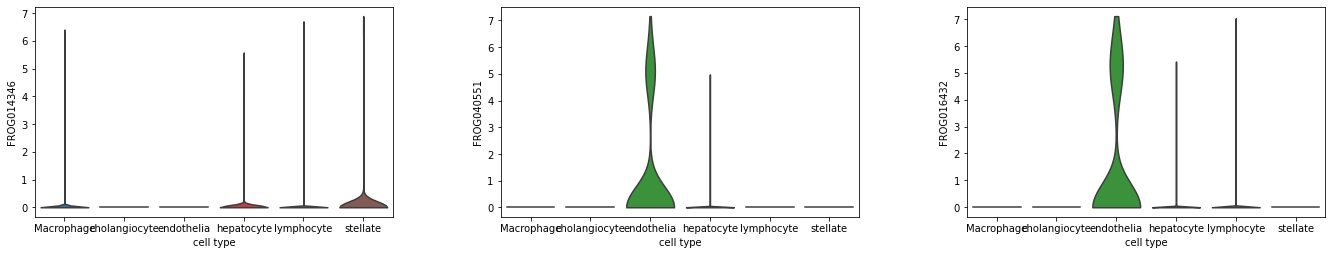

In [80]:
sc.pl.violin(frog,['FROG014346','FROG040551','FROG016432'],groupby='cell_type',stripplot=False,save='_frog_FLT.pdf')

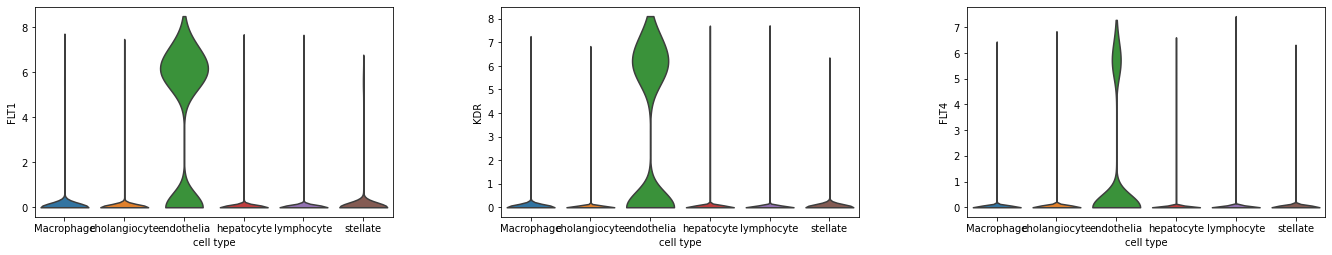

In [81]:
sc.pl.violin(human,['FLT1','KDR','FLT4'],groupby='cell_type',stripplot=False,save='_human_FLT.pdf')

In [94]:
os.getcwd()

'h:\\002.singcell\\01.liver\\10.mutileSpecies\\05.SAMap'

In [ ]:
sc.pl.dotplot(t,['APOB'],groupby='leiden')

In [136]:
t=sc.read('H:/002.singcell/01.liver/10.mutileSpecies/05.SAMap/01.h5ad_counts/count_new/lamprey_counts.h5ad')

In [138]:
t.X.max()

22001.0

In [139]:
sc.pp.normalize_total(t,target_sum=1e6,exclude_highly_expressed=True)

In [140]:
sc.pp.log1p(t)

In [141]:
t.raw = t

In [142]:
sc.pp.highly_variable_genes(t, flavor='seurat', n_top_genes=2000, inplace=True,batch_key="sample")

In [146]:
t.obs['cell_type']=info['cell_type']

In [ ]:
sc.pl.dotplot(lamprey,['APOB'],groupby='cell_type')

In [4]:
import os, sys, re
import scanpy as sc
import scanpy.external as sce
import anndata
import bbknn
import scanorama
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scrublet as scr
import pandas as pd
def read_10X_data(data_10X="",min_genes=200,max_genes=2500,min_cells=3,species="",reads_ratio=1):
    # adata = sc.read_h5ad(data_10X)
    adata = sc.read_10x_mtx(data_10X)
    adata.var_names_make_unique()
    sc.pp.filter_cells(adata, min_genes=min_genes)
    sc.pp.filter_cells(adata, max_genes=max_genes)
    sc.pp.filter_genes(adata, min_cells=min_cells)
    adata.var_names=[x.upper() for x in adata.var_names]
    adata.var_names_make_unique()
    adata.obs['n_counts'] = adata.X.sum(axis=1).A1
    # adata=adata[adata.obs["n_counts"]>500]
    # sc.pp.normalize_per_cell(adata, key_n_counts="n_counts_all")
    # sc.pp.normalize_total(adata,key_added="n_counts_all")
    return adata

In [7]:
adata =read_10X_data('H:/002.singcell/01.liver/04.lungfish/04.new/03.xuanye3')

In [8]:
adata

AnnData object with n_obs × n_vars = 3360 × 18695
    obs: 'n_genes', 'n_counts'
    var: 'gene_ids', 'feature_types', 'n_cells'

In [10]:
lungfish=info[info['species']=='lungfish']

In [14]:
lungfish.index=lungfish.index.str.split('-lungfish').str[0]

In [18]:
lungfish=lungfish[~lungfish.index.duplicated(keep='first')]

In [19]:
adata.obs['cell_type']=lungfish['cell_type']

In [22]:
sc.pp.normalize_total(adata,target_sum=1e6,exclude_highly_expressed=True)

In [23]:
adata.layers["CPM"]=adata.X.copy()
sc.pp.log1p(adata)
adata.raw = adata

In [30]:
sc.pp.highly_variable_genes(adata, flavor='seurat', n_top_genes=2000, inplace=True)

In [31]:
sc.pp.regress_out(adata, ["n_counts"])
sc.pp.scale(adata, max_value=10)
sc.pp.pca(adata, n_comps=50, svd_solver='arpack',use_highly_variable=True)
sc.pp.neighbors(adata,n_neighbors=20, n_pcs=40)

In [32]:
sc.tl.umap(adata)

In [36]:
os.chdir('H:/002.singcell/01.liver/10.mutileSpecies/05.SAMap/18.recruitment')

In [33]:
sc.tl.leiden(adata, key_added='leiden', resolution=0.2)

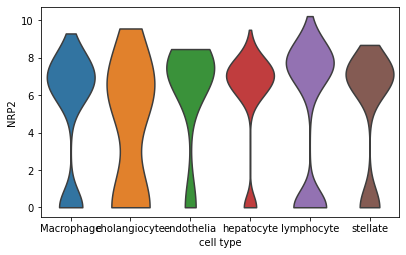

In [39]:
sc.pl.violin(adata,['NRP2'],groupby='cell_type',stripplot=False,save='_lungfish_NRP2.svg')